In [3]:
import cv2
import dlib
import matplotlib.pyplot as plt

In [2]:
from google.colab import files

In [4]:
def detect_face(image):
    # Load the pre-trained HOG face detector from dlib
    face_detector = dlib.get_frontal_face_detector()

    # Detect faces in the image
    faces = face_detector(image, 1)

    if len(faces) > 0:
        # Assuming only one face, you can modify this if there are multiple faces
        x, y, w, h = faces[0].left(), faces[0].top(), faces[0].width(), faces[0].height()
        bounding_box = (x, y, w, h)
        return bounding_box
    else:
        # If no face is detected, use the entire image as the bounding box
        height, width, _ = image.shape
        bounding_box = (0, 0, width, height)
        return bounding_box

In [26]:
uploaded = files.upload()
filename = next(iter(uploaded))

Saving oily_0d852556c21686e16906_jpg.rf.30a84748412c51c7490001e78ac9b158.jpg to oily_0d852556c21686e16906_jpg.rf.30a84748412c51c7490001e78ac9b158.jpg


Face detected. Bounding box: (92, 93, 224, 224)


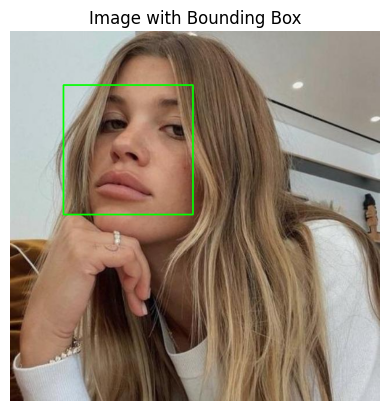

In [27]:
image = cv2.imread(filename)

if image is not None:
    bounding_box = detect_face(image)

    print(f"Face detected. Bounding box: {bounding_box}")

    # Draw the bounding box on the image
    x, y, w, h = bounding_box
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the image with the bounding box using matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Image with Bounding Box")
    plt.axis("off")
    plt.show()

    # You can then use the bounding box to extract the face or perform further processing
else:
    print("Failed to load the image.")

In [28]:
def extract_cheeks_and_forehead(image, bounding_box):
    x, y, w, h = bounding_box

    # Define regions for cheeks and forehead
    forehead_roi = image[y:y + h//3, x:x + w]
    cheeks_roi = image[y + 2*h//3:y + h, x:x + w]

    return forehead_roi, cheeks_roi

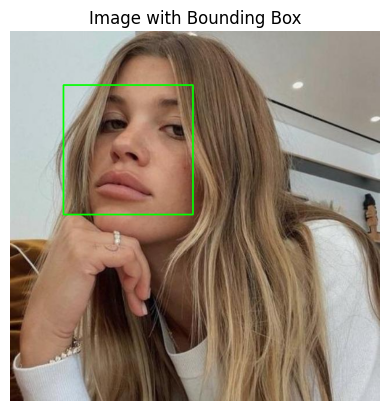

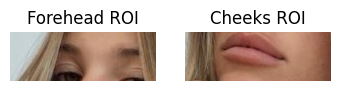

In [29]:
image = cv2.imread(filename)
bounding_box = detect_face(image)

if bounding_box is not None:
    forehead_roi, cheeks_roi = extract_cheeks_and_forehead(image, bounding_box)

    # Display the original image with the bounding box
    image_with_bbox = image.copy()
    x, y, w, h = bounding_box
    cv2.rectangle(image_with_bbox, (x, y), (x + w, y + h), (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(image_with_bbox, cv2.COLOR_BGR2RGB))
    plt.title("Image with Bounding Box")
    plt.axis("off")
    plt.show()

    # Display the extracted regions
    plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(forehead_roi, cv2.COLOR_BGR2RGB)), plt.title('Forehead ROI')
    plt.axis("off")
    plt.subplot(1, 3, 2), plt.imshow(cv2.cvtColor(cheeks_roi, cv2.COLOR_BGR2RGB)), plt.title('Cheeks ROI')
    plt.axis("off")
    plt.show()

    # You can further process forehead_roi and cheeks_roi as needed
else:
    print("No face detected.")


In [30]:
import numpy as np

def extract_skin_roi(image, bounding_box):
    x, y, w, h = bounding_box

    # Extract the face region
    face_roi = image[y:y + h, x:x + w]

    # Convert the face region to HSV color space
    hsv_face = cv2.cvtColor(face_roi, cv2.COLOR_BGR2HSV)

    # Define a range for skin color in HSV
    lower_skin = np.array([0, 20, 70], dtype=np.uint8)
    upper_skin = np.array([20, 255, 255], dtype=np.uint8)

    # Create a binary mask for the skin color range
    skin_mask = cv2.inRange(hsv_face, lower_skin, upper_skin)

    # Apply the mask to extract the skin region
    skin_roi = cv2.bitwise_and(face_roi, face_roi, mask=skin_mask)

    return skin_roi


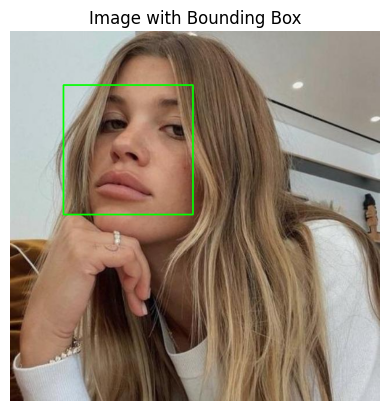

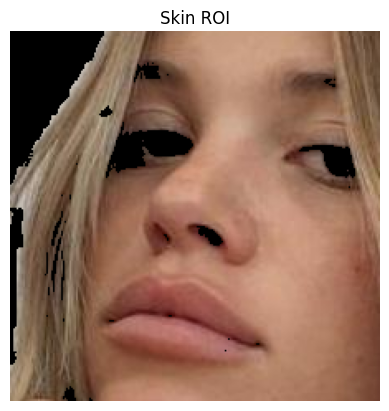

In [31]:
image = cv2.imread(filename)
bounding_box = detect_face(image)

if bounding_box is not None:
    skin_roi = extract_skin_roi(image, bounding_box)

    # Display the original image with the bounding box
    image_with_bbox = image.copy()
    x, y, w, h = bounding_box
    cv2.rectangle(image_with_bbox, (x, y), (x + w, y + h), (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(image_with_bbox, cv2.COLOR_BGR2RGB))
    plt.title("Image with Bounding Box")
    plt.axis("off")
    plt.show()

    # Display the extracted skin region
    plt.imshow(cv2.cvtColor(skin_roi, cv2.COLOR_BGR2RGB))
    plt.title('Skin ROI')
    plt.axis("off")
    plt.show()

    # You can further process skin_roi as needed
else:
    print("No face detected.")
